# Τεχνικές Eξόρυξης Δεδομένων - Άσκηση 1
_Βαργιάμης Μιχαήλ, sdi1300018_

---

In [1]:
import collections
import copy
import itertools
import numpy as np
import pandas as pd

In [2]:
netflix_titles = "netflix_titles.csv"
imdb_movies = "IMDb movies.csv"
imdb_ratings = "IMDb ratings.csv"

In [3]:
df1 = pd.read_csv(netflix_titles)
df2 = pd.read_csv(imdb_movies, low_memory=False)
df3 = pd.read_csv(imdb_ratings)

In [4]:
def replace_nan(df):
    for i in df.columns:
        df[i] = df[i].fillna("None")

In [5]:
replace_nan(df1)
replace_nan(df2)
replace_nan(df3)

In [6]:
# Use a subset of the actual dataset
df1 = df1.head(100)

### Ερώτημα 1

In [7]:
# print(df1.type.describe())
print(df1.type.value_counts())

Movie      79
TV Show    21
Name: type, dtype: int64


### Ερώτημα 2

In [8]:
# print(df1.query('release_year > 2015').type.describe())
print(df1.query('release_year > 2015').type.value_counts())

Movie      48
TV Show    18
Name: type, dtype: int64


### Ερώτημα 3

In [9]:
# print(df1.country.describe())
print(df1.country.value_counts())

United States                         33
India                                 11
South Korea                            6
Turkey                                 5
United Kingdom                         5
None                                   4
Indonesia                              4
Canada                                 3
Spain                                  3
Nigeria                                2
France                                 2
Romania                                2
Mexico                                 2
Italy                                  2
Egypt                                  1
United States, South Africa            1
United States, Germany                 1
Portugal, Spain                        1
Hong Kong, China, Singapore            1
Thailand                               1
Japan                                  1
Argentina                              1
Norway, Iceland, United States         1
United States, France, Serbia          1
South Africa, Ch

### Ερώτημα 4

In [10]:
df0 = pd.DataFrame(columns = ['country', 'listed_in'])
for country, genre in zip(df1.country, df1.listed_in):
    countries = [s.strip() for s in country.split(',')]
    genres = [s.strip() for s in genre.split(',')]
    for c, g in itertools.product(countries, genres):
        temp = {'country': c, 'listed_in': g}
        df0 = df0.append(temp, ignore_index=True)

df0.groupby("country").listed_in.unique()

country
Argentina         [Action & Adventure, Comedies, International M...
Brazil            [International TV Shows, TV Dramas, TV Sci-Fi ...
Canada            [Documentaries, International Movies, Comedies...
China                    [Action & Adventure, International Movies]
Egypt                         [Horror Movies, International Movies]
France            [Comedies, Dramas, International Movies, Actio...
Germany                                        [Action & Adventure]
Hong Kong                [Action & Adventure, International Movies]
Iceland           [Dramas, Thrillers, Horror Movies, Internation...
India             [Horror Movies, International Movies, Thriller...
Indonesia         [Dramas, International Movies, Romantic Movies...
Italy             [Documentaries, International Movies, Dramas, ...
Japan                        [Anime Series, International TV Shows]
Mexico            [Dramas, International Movies, Crime TV Shows,...
Nigeria           [Dramas, International

### Ερώτημα 5

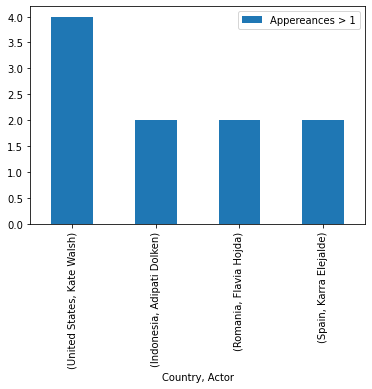

In [11]:
# For this question, no distinction were made between Movies and Tv Series

from collections import Counter

# Create dictionary with all actor appereances for each country
top_actors = {}
for cast, countries in zip(df1.cast, df1.country):
    for country in [s.strip() for s in countries.split(',')]:
        if country not in top_actors:
            top_actors[country] = [s.strip() for s in cast.split(',')]
        else:
            top_actors[country].extend([s.strip() for s in cast.split(',')])


# Create list of tuples ((country, most_famous_actor), appereances)
# for each country
data = []
for country, actor_list in top_actors.items():
    if country == "None":
        continue
    counter = Counter(actor_list)
    most_common = counter.most_common()
    
    if most_common[0][0] != "None" and most_common[0][1] > 1:
        data.append(((country, most_common[0][0]), most_common[0][1]))
    elif most_common[0][0] == "None" and most_common[1][1] > 1:
        data.append(((country, most_common[1][0]), most_common[1][1]))

# Import data into a dataframe and plot
df0 = pd.DataFrame(data, columns = ['Country, Actor', 'Appereances > 1'])
df0.plot.bar(x='Country, Actor')   
None

### Ερώτημα 6

Counter({'Mature': 37, 'Teens': 30, 'Older kids': 6, 'Little Kids': 3})
Counter({'Mature': 12, 'Teens': 8, 'Older kids': 1})


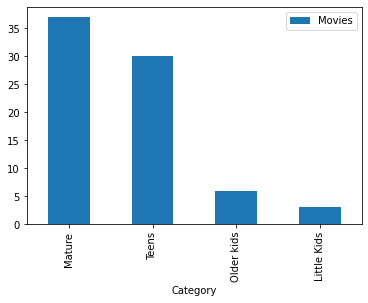

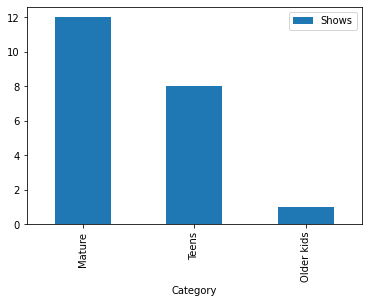

In [12]:
group_names = ["Little Kids","Older kids", "Teens", "Mature" ]
groups = {
    group_names[0]: ["G", "TV-Y", "TV-G"],
    group_names[1]: ["PG, TV-Y7", "TV-Y7-FV", "TV-PG"],
    group_names[2]: ["PG-13", "TV-14"],
    group_names[3]: ["R", "NC-17", "TV-MA"]
}

c_movies = Counter()
c_shows = Counter()
for r, t in zip(df1.rating, df1.type):
    for i in range(len(group_names)):
        if r in groups[group_names[i]]:
            if t == "Movie":
                c_movies[group_names[i]] += 1
            elif t == "TV Show":
                c_shows[group_names[i]] += 1
print(c_movies)
print(c_shows)
df_movies = pd.DataFrame.from_dict(c_movies, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Movies' })
df_shows = pd.DataFrame.from_dict(c_shows, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Shows' })
df_movies.plot.bar(x='Category')   
df_shows.plot.bar(x='Category')   
None

### Ερώτημα 7

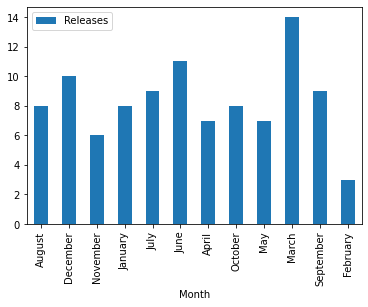

In [13]:
c = Counter()
for d in df1.date_added:
    d = d.split()[0]
    c[d] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Month', 0: 'Releases' })
df0.plot.bar(x='Month')
None

### Ερώτημα 8

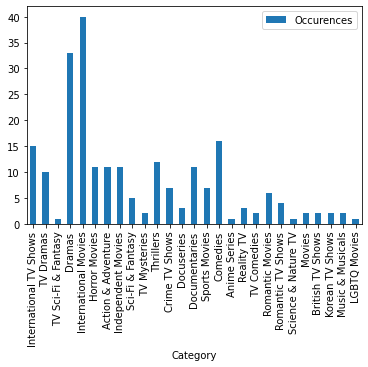

In [14]:
c = Counter()
for category_list in df1.listed_in:
    for category in [s.strip() for s in category_list.split(',')]:
        c[category] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Category', 0: 'Occurences' })
df0.plot.bar(x='Category')
None

### Ερώτημα 9

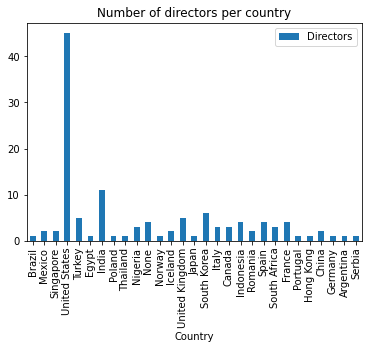

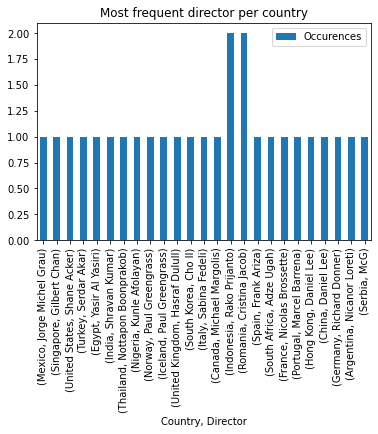

In [15]:
from collections import defaultdict
c = Counter()
directors_per_country = defaultdict(Counter)

for country_list, director_list in zip(df1.country, df1.director):
    for country in [s.strip() for s in country_list.split(',')]:
        for director in [s.strip() for s in director_list.split(',')]:
            c[country] += 1
            directors_per_country[country][director] += 1

data = []
for country, directors in directors_per_country.items():
    if country == "None":
        continue
    if directors.most_common()[0][0] != "None":
        data.append(((country, directors.most_common()[0][0]), directors.most_common()[0][1]))
    else:
        if len(directors) < 2:
            continue
        data.append(((country, directors.most_common()[1][0]), directors.most_common()[1][1]))

df00 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Country', 0: 'Directors' })
df00.plot.bar(x='Country', title="Number of directors per country")
None   
df01 = pd.DataFrame(data, columns = ['Country, Director', 'Occurences'])
df01.plot.bar(x='Country, Director', title="Most frequent director per country")   
None

### Ερώτημα 10

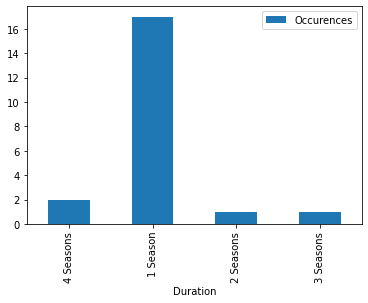

In [16]:
c = Counter()
for type, duration in zip(df1.type, df1.duration):
    if type != "TV Show":
        continue
    c[duration] += 1
 
df0 = pd.DataFrame.from_dict(c, orient='index').reset_index().rename(columns={'index': 'Duration', 0: 'Occurences' })
df0.plot.bar(x='Duration')
None

### Ερώτημα 11

In [17]:
top_n = 10

df0 = pd.merge(df2[['imdb_title_id', 'title']], df1[['show_id', 'title']], how='inner', on='title')
df0 = pd.merge(df0, df3[['imdb_title_id', 'weighted_average_vote']], how='inner')

print(df0[['title', 'weighted_average_vote']].sort_values(by='weighted_average_vote', ascending=False)[:top_n])

          title  weighted_average_vote
7      2 States                    8.2
2   3 Deewarein                    7.8
12         1983                    7.7
3             9                    7.7
4             9                    7.1
8      2 States                    6.9
20          122                    6.8
6            21                    6.8
9          1920                    6.4
1          1922                    6.3


## Recommendation System

In [18]:
import nltk
from nltk.stem.snowball import SnowballStemmer

In [19]:
# Create corpus
corpus = [title + ' ' + description for title, description in zip(df1.title, df1.description)]
print(len(corpus))

100


In [20]:
# Run this block for test corpus
#corpus = [
#    "an apple a day keeps the doctor away",
#    "mary ate an apple per day day okay",
#    "i don't like apples neither doctors",
#    "who eats apples and not doctors",
#    "two apples a day do not keep doctors away"
#]

In [21]:
# Stem corpus
stemmer = SnowballStemmer("english")
corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in corpus]
#print(corpus, "\n")

### Part 1

In [22]:
# Boolean bag of words
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', binary=True)
count_vectorizer_vectors = count_vectorizer.fit_transform(corpus)

#print(count_vectorizer.get_feature_names())
#print(count_vectorizer_vectors.toarray())
print(count_vectorizer_vectors.shape)

(100, 2582)


In [23]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(1,2))
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(corpus)

#print(tfidf_vectorizer.get_feature_names())
#print(tfidf_vectorizer_vectors.toarray())
print(tfidf_vectorizer_vectors.shape)

(100, 1000)


### Part 2

In [24]:
topk = 10

In [25]:
# Jaccard distance

def pairwise_jaccard(X):
    """Computes the Jaccard distance between the rows of `X`.
    """
    #X = X.astype(bool).astype(int)

    intrsct = X.dot(X.T)
    row_sums = intrsct.diagonal()
    unions = row_sums[:,None] + row_sums - intrsct
    dist = 1.0 - intrsct / unions
    return dist

jaccard_distance = pairwise_jaccard(count_vectorizer_vectors).tolist()

In [26]:
jaccard_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), jaccard_distance)
}

In [27]:
# Cosine distance
from sklearn.metrics import pairwise_distances

cosine_distance = pairwise_distances(X=tfidf_vectorizer_vectors, metric='cosine').tolist()
#print(cosine_distance)

In [28]:
cosine_similar_content = {
    df1.title[i]: [df1.title[j] for j in sorted(range(len(row)), key = lambda j: row[j])[1:topk+1]] 
for i, row in zip(range(len(df1.title)), cosine_distance)
}

### Part 3

In [29]:
def get_similar_movies(title, N=10, method='boolean_bow'):
    methods_available = ['boolean_bow', 'tf_idf']
    
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    if method == methods_available[0]:
        return jaccard_similar_content[title][:N]
    elif method == methods_available[1]:
        return cosine_similar_content[title][:N]

In [30]:
title = df1.title[3]
print("Similar to %s:" % title)
print(get_similar_movies(title, method='boolean_bow'))
print()
print("Similar to %s:" % title)
print(get_similar_movies(title, method='tf_idf'))

Similar to 9:
['21 Again', '2015 Dream Concert', '3%', 'Òlòtūré', '21', '1983', '100 Things to do Before High School', '20 Feet From Stardom', '21 Thunder', '10 Days in Sun City']

Similar to 9:
['2015 Dream Concert', '21 Again', '3%', '21', '21 Thunder', '100 Things to do Before High School', '10 Days in Sun City', '20 Feet From Stardom', 'Òlòtūré', '1983']


### Part 4

In [31]:
from heapq import heapify, heappush, heappushpop, nlargest
from scipy.spatial import distance

def get_similar_movies2(description, N=10, method='boolean_bow'):

    class TopnHeap():
        def __init__(self, n):
            self.h = []
            self.length = n
            heapify(self.h)

        def add(self, element):
            if len(self.h) < self.length:
                heappush(self.h, element)
            else:
                heappushpop(self.h, element)

        def get_topn(self):
            return nlargest(self.length, self.h)

    methods_available = ['boolean_bow', 'tf_idf']
    
    if method not in methods_available:
        raise ValueError("method not available")
    
    N = N if N < topk else topk
    
    new_corpus = [description]
    new_corpus = [' '.join([stemmer.stem(word) for word in sentence.split()]) for sentence in new_corpus]
    new_corpus = corpus + new_corpus
    
    topn = TopnHeap(N) 
        
    # boolean bow
    if method == methods_available[0]:
        count_vectorizer_vectors2 = count_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = count_vectorizer_vectors2[-1]
            v2 = count_vectorizer_vectors2[i]
            dist = distance.jaccard(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()] 
    
    # tf_idf
    elif method == methods_available[1]:
        tfidf_vectorizer_vectors2 = tfidf_vectorizer.fit_transform(new_corpus).toarray()
        for i in range(len(corpus)):
            v1 = tfidf_vectorizer_vectors2[-1]
            v2 = tfidf_vectorizer_vectors2[i]
            dist = distance.cosine(v1, v2)
            topn.add((-dist, i))
        return [df1.title[pair[1]] for pair in topn.get_topn()]
    

In [32]:
title = 'When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.'
print("Similar to \n%s" % title)
print("\nUsing boolean bow")
print(get_similar_movies2(title, method='boolean_bow'))
print("\nUsing tf-idf")
print(get_similar_movies2(title, method='tf_idf'))

Similar to 
When a beautiful stranger leads computer hacker Neo to a forbidding underworld, he discovers the shocking truth--the life he knows is the elaborate deception of an evil cyber-intelligence.

Using boolean bow
['\u200b\u200bKuch Bheege Alfaaz', '706', '#Roxy', '28 Moons', '46', '21 Again', '21 & Over', '20 Minutes', '7:19', '100 Days My Prince']

Using tf-idf
['\u200b\u200bKuch Bheege Alfaaz', '706', '#Roxy', '\u200bGoli Soda 2', '46', '28 Moons', '100 Days Of Solitude', '21 & Over', '20 Minutes', '7:19']
